In [1]:
#%run divvy_download.py

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
directory = "./extracted_files_test"

dataframes_number = {}
dataframes_divvy = {}
i = 0
j = 0
for root, dirs, files in os.walk(directory):
    for filename in files:
        file_path = os.path.join(root, filename)
        #print(f"File: {file_path}")
        if filename.endswith('tripdata.csv'): #or filename.startswith('Divvy_Trips'):  
            #print(filename)
            try:
                df = pd.read_csv(file_path)
                dataframes_number[i] = df
                i += 1
            except:
                pass
            
        if filename.startswith('Divvy_Trips'):
            #print(filename)           
            try:
                df = pd.read_csv(file_path)
                dataframes_divvy[j] = df
                j += 1
            except:
                pass

/var/folders/qx/bdlxtnn15xg42mxf3d1962000000gn/T/ipykernel_1020/4161177170.py:23: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,10426657,6/30/2016 23:59,7/1/2016 0:02,1508,190,93,Sheffield Ave & Willow St,113,Bissell St & Armitage Ave,Subscriber,Male,1993.0
1,10426656,6/30/2016 23:58,7/1/2016 0:14,1858,967,90,Millennium Park,90,Millennium Park,Customer,NaN,NaN
2,10426655,6/30/2016 23:58,7/1/2016 0:16,3076,1082,36,Franklin St & Jackson Blvd,69,Damen Ave & Pierce Ave,Subscriber,Male,1992.0
3,10426654,6/30/2016 23:58,7/1/2016 0:22,4031,1445,258,Logan Blvd & Elston Ave,251,Clarendon Ave & Leland Ave,Customer,NaN,NaN
4,10426653,6/30/2016 23:58,7/1/2016 0:14,4199,974,90,Millennium Park,90,Millennium Park,Customer,NaN,NaN


In [5]:
def merge_dfs(dataframes):
    merged = dataframes[0]
    for i in range(1,len(dataframes)):
        merged = pd.concat([merged,dataframes[i]], axis=0, ignore_index=True)
    return merged

In [6]:
merged_number = merge_dfs(dataframes_number)   

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

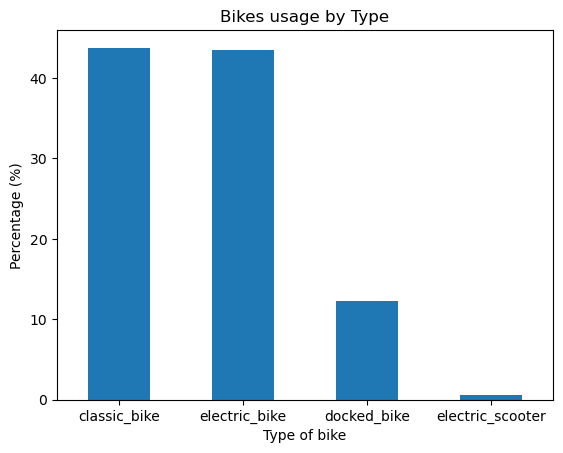

In [8]:
rideable_type_percent = merged_number['rideable_type'].value_counts(normalize=True) * 100
rideable_type_percent.plot(kind='bar',rot=0)

plt.title('Bikes usage by Type')
plt.xlabel('Type of bike')
plt.ylabel('Percentage (%)')
plt.show()

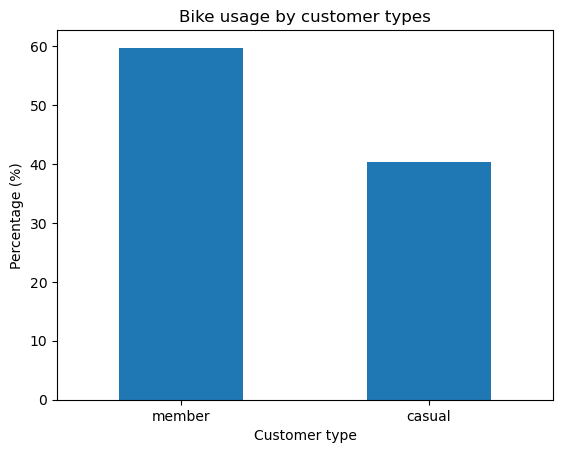

In [9]:
member_casual_percent = merged_number['member_casual'].value_counts(normalize=True) * 100
member_casual_percent.plot(kind='bar',rot=0)

plt.title('Bike usage by customer types')
plt.xlabel('Customer type')
plt.ylabel('Percentage (%)')
plt.show()

In [10]:
df = merged_number

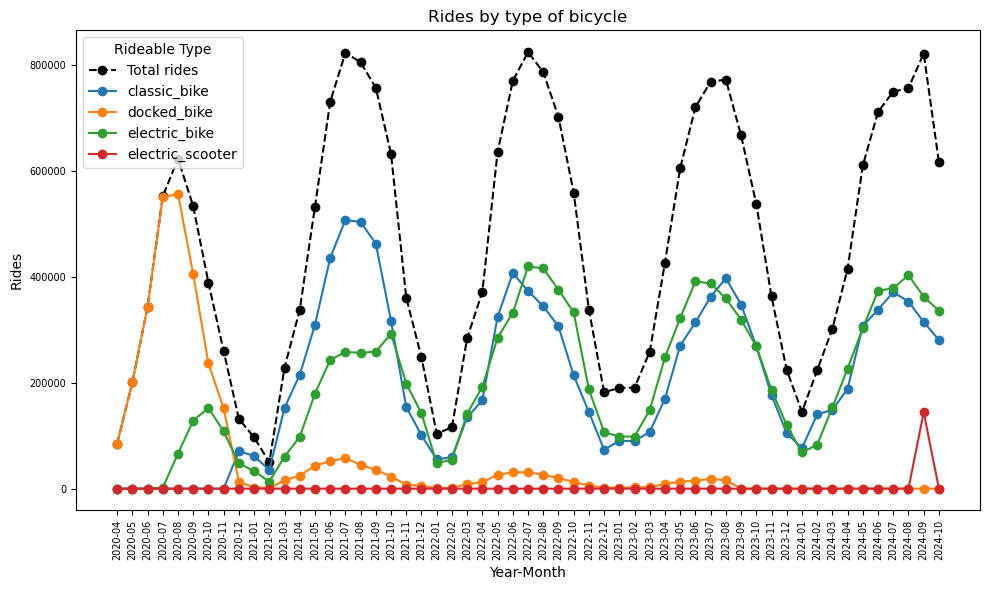

In [11]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Create a new column that represents the 'year-month' combination
df['year_month'] = df['started_at'].dt.to_period('M')

# Count the number of occurrences in each 'year-month'
incidences_by_type = df.groupby(['year_month', 'rideable_type']).size().unstack(fill_value=0)
total_incidences = incidences_by_type.sum(axis=1)

plt.figure(figsize=(10, 6))

plt.plot(incidences_by_type.index.astype(str), total_incidences, 
         marker='o', label='Total rides', color='black', linestyle='--')

# Plot each category
for rideable_type in incidences_by_type.columns:
    plt.plot(incidences_by_type.index.astype(str), incidences_by_type[rideable_type], 
             marker='o', label=rideable_type)

# Add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Rides')
plt.title('Rides by type of bicycle')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.tick_params(labelsize=7)
# Add a legend to differentiate rideable types
plt.legend(title="Rideable Type")

plt.tight_layout()

plt.show()


In [12]:
df['year_month_day'] = df['started_at'].dt.to_period('D')
incidences_by_type_day = df.groupby(['year_month_day', 'rideable_type']).size().unstack(fill_value=0)
total_incidences_day = incidences_by_type_day.sum(axis=1)

In [13]:
df['hour'] = df['started_at'].dt.to_period('H')

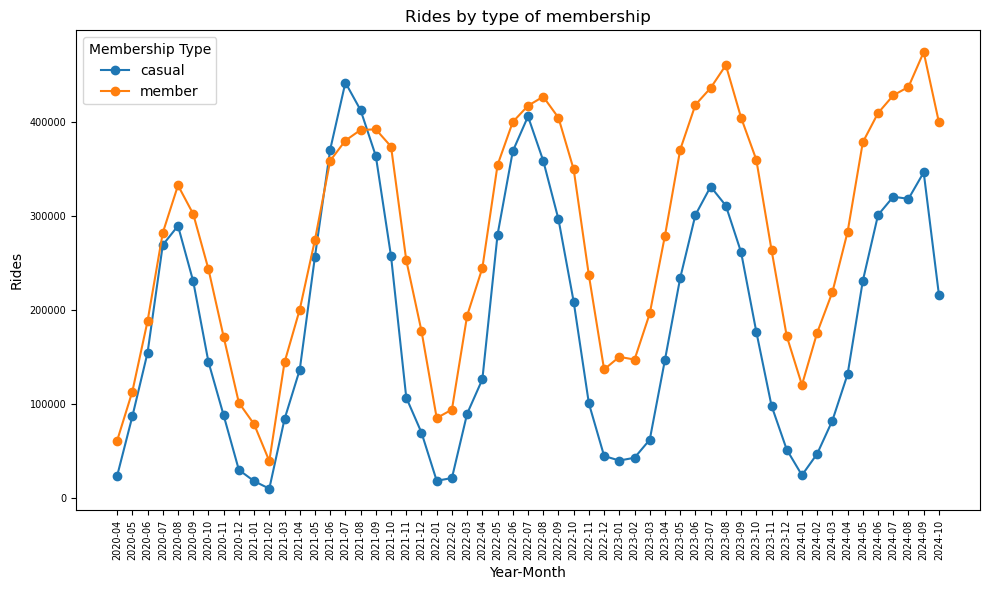

In [14]:
membs_by_type = df.groupby(['year_month', 'member_casual']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

for rideable_type in membs_by_type.columns:
    plt.plot(membs_by_type.index.astype(str), membs_by_type[rideable_type], 
             marker='o', label=rideable_type)

# Add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Rides')
plt.title('Rides by type of membership')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
#plt.gca().set_xticks(incidences_by_type.index.to_timestamp()[::3].to_pydatetime())
plt.tick_params(labelsize=7)
# Add a legend to differentiate rideable types
plt.legend(title="Membership Type")

plt.tight_layout()

plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Streeter Dr & Grand Ave'),
  Text(1, 0, 'Michigan Ave & Oak St'),
  Text(2, 0, 'Clark St & Elm St'),
  Text(3, 0, 'Wells St & Concord Ln'),
  Text(4, 0, 'Millennium Park')])

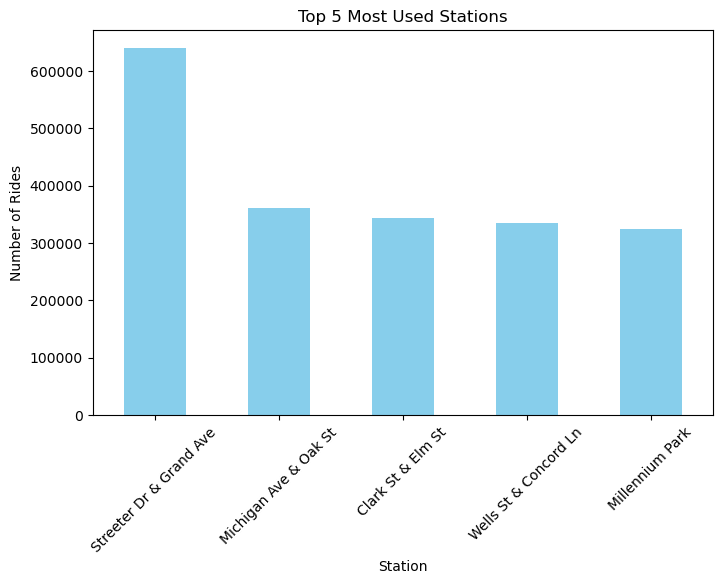

In [15]:
combined_stations = pd.concat([df['start_station_name'], df['end_station_name']])

station_counts = combined_stations.value_counts()
station_counts_5 = combined_stations.value_counts().nlargest(5)

# Plot the top 5 stations as a bar plot
plt.figure(figsize=(8, 5))
station_counts_5.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Station')
plt.ylabel('Number of Rides')
plt.title('Top 5 Most Used Stations')
plt.xticks(rotation=45)



In [16]:
df['ride_time'] = df['ended_at'] - df['started_at']
df['ride_time'] = pd.to_timedelta(df['ride_time'])

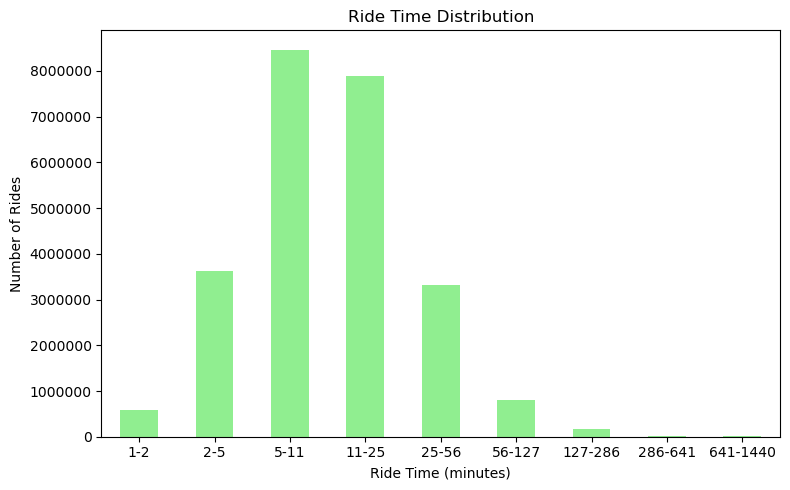

In [17]:
df['ride_time_minutes'] = df['ride_time'].dt.total_seconds() / 60

# Bin the ride times into 10-minute intervals
#bins = range(0, 240, 10)
bins = np.logspace(np.log10(1), np.log10(1440), num=10)

df['ride_time_bin'] = pd.cut(df['ride_time_minutes'], bins=bins)

# Count the number of rides in each bin
ride_time_counts = df['ride_time_bin'].value_counts().sort_index()
bin_labels = [f'{int(interval.left)}-{int(interval.right)}' for interval in ride_time_counts.index]
# Plot the counts as a bar plot
plt.figure(figsize=(8, 5))
ride_time_counts.plot(kind='bar', color='lightgreen')

# Add labels and title
plt.xlabel('Ride Time (minutes)')
plt.ylabel('Number of Rides')
plt.title('Ride Time Distribution')

# Rotate x-axis labels for better readability
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels)
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: int(x)))
plt.tight_layout()
plt.show()

In [18]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Apply the function to calculate the distance and store it in a new column
df['distance_km'] = haversine(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

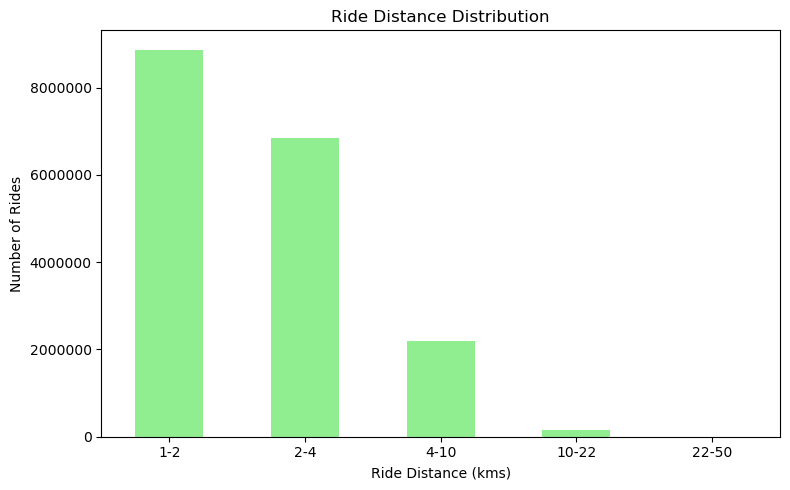

In [19]:
#bins = range(0, 100, 10)
bins = np.logspace(np.log10(1), np.log10(50), num=6)

df['ride_distance_bin'] = pd.cut(df['distance_km'], bins=bins)

ride_distance_counts = df['ride_distance_bin'].value_counts().sort_index()
bin_labels = [f'{int(interval.left)}-{int(interval.right)}' for interval in ride_distance_counts.index]
# Plot the counts as a bar plot
plt.figure(figsize=(8, 5))
ride_distance_counts.plot(kind='bar', color='lightgreen')

# Add labels and title
plt.xlabel('Ride Distance (kms)')
plt.ylabel('Number of Rides')
plt.title('Ride Distance Distribution')

# Rotate x-axis labels for better readability
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels)
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: int(x)))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distance vs time')

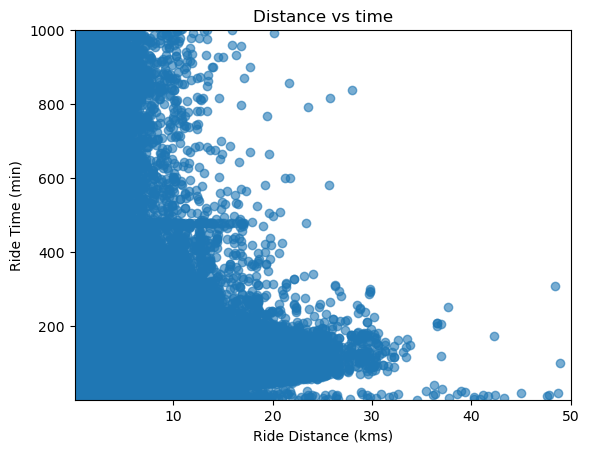

In [20]:
plt.scatter(df['distance_km'], df['ride_time_minutes'], alpha=0.6)
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([0.1,50])
plt.ylim([1,1000])
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: int(x)))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: int(x)))

plt.xlabel('Ride Distance (kms)')
plt.ylabel('Ride Time (min)')
plt.title('Distance vs time')
#plt.ylim([1,600])

In [21]:
station_counts = combined_stations.value_counts().reset_index()
station_counts.columns = ['start_station_name', 'count']

# Step 2: For each station, get the mode of latitude and longitude
unique_stations = df.groupby('start_station_name').agg({
    'start_lat': lambda x: x.mode()[0],  # Get mode for latitude
    'start_lng': lambda x: x.mode()[0]  # Get mode for longitude
}).reset_index()

# Step 3: Merge the counts with the unique stations data
station_summary_df = pd.merge(station_counts, unique_stations, on='start_station_name', how='left')

In [22]:
station_summary_df = station_summary_df.dropna()

In [ ]:
from geopy.geocoders import ArcGIS
import folium

import ipywidgets as widgets
from IPython.display import display, clear_output

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="location_details")

location = geolocator.geocode("Chicago")
print((location.latitude, location.longitude))

mymap = folium.Map(location=[location.latitude, location.longitude], zoom_start=12)

#for station in station_counts.items():

#   coef = station[1]
#    popup_info = station[0]+'\n'+str(coef)
        
#    folium.Circle(location=[df[df['start_station_name'] == station[0]].start_lat.mode()[0],df[df['start_station_name'] == station[0]].start_lng.mode()[0]],radius=coef/1000,popup=popup_info,color="blue",fill=True,fill_color="blue",fill_opacity=0.4).add_to(mymap)


for index, row in station_summary_df.iterrows():
    coef = row['count']/1000
    popup_info = row['start_station_name']+'\n'+str(row['count'])        
    folium.Circle(location=[row['start_lat'],row['start_lng']],radius=coef,popup=popup_info,color="blue",fill=True,fill_color="blue",fill_opacity=0.4).add_to(mymap)
  
display(mymap)

(41.8755616, -87.6244212)


In [24]:
# Convert the 'started_at' column to datetime if it's not already
df['started_at'] = pd.to_datetime(df['started_at'])

# Extract only the hour and format it as 'HH:00'
df['hour'] = df['started_at'].dt.strftime('%H:00')

# Count the number of incidences for each hour
hourly_counts = df['hour'].value_counts().sort_index()

In [25]:
theta = np.linspace(0.0, 2*np.pi, 12, endpoint=False)
radii = list(hourly_counts)
base_width = 2*np.pi /24
width = base_width

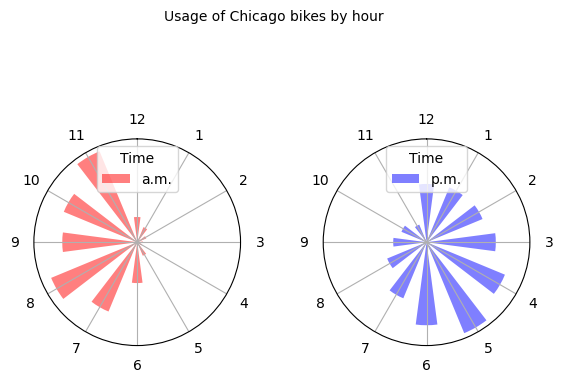

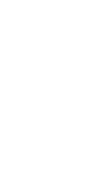

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'})
plt.suptitle('Usage of Chicago bikes by hour', fontsize=10)
fig.subplots_adjust(wspace=0.4)
plt.figure(figsize=(1,2))
plt.axis('off')

ax1.set_theta_direction(-1)
ax1.set_theta_offset(np.pi / 2.0)
ax1.bar(theta, radii[0:12], bottom=0.0, width=width, color='r', alpha=0.5)
ax1.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax1.set_yticks([])
ax1.set_xticklabels([12, *range(1, 12)])
ax1.legend(['a.m.'], title='Time', loc='upper center');

ax2.set_theta_direction(-1)
ax2.set_theta_offset(np.pi / 2.0)
ax2.bar(theta, radii[12:24], bottom=0.0, width=width, color='b', alpha=0.5)
ax2.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax2.set_yticks([])
ax2.set_xticklabels([12, *range(1, 12)])
ax2.legend(['p.m.'], title='Time', loc='upper center');

plt.show()

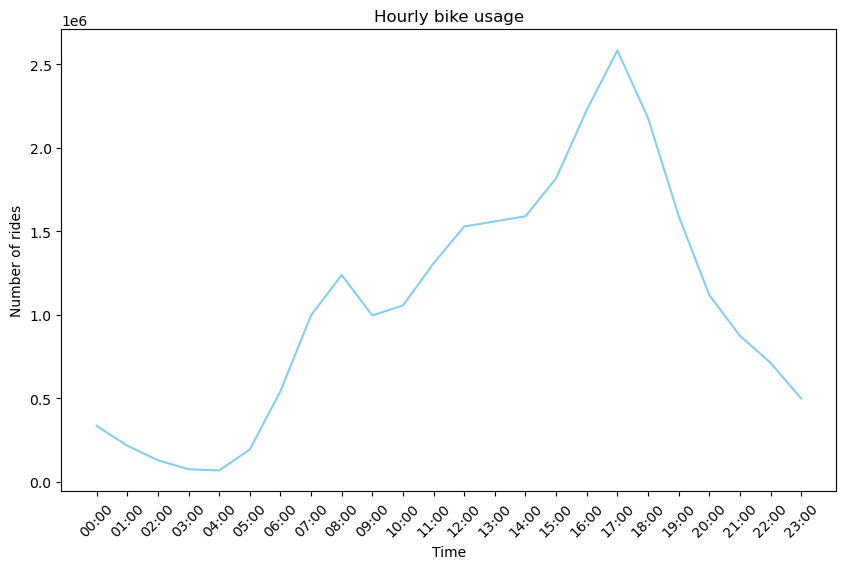

In [27]:
hourly_counts.plot(figsize=(10, 6), color='skyblue')
plt.title('Hourly bike usage')
plt.xlabel('Time')
plt.ylabel('Number of rides')
plt.xticks(ticks=range(len(hourly_counts)), labels=hourly_counts.index, rotation=45);

In [28]:
df['started_at'] = pd.to_datetime(df['started_at'])

# Extract the day of the week and set the correct order
df['day_of_week'] = pd.Categorical(df['started_at'].dt.day_name(), 
                                   categories=["Monday", "Tuesday", "Wednesday", "Thursday", 
                                               "Friday", "Saturday", "Sunday"], 
                                   ordered=True)

# Count occurrences of each day of the week, now in the correct order
day_counts = df['day_of_week'].value_counts().sort_index()

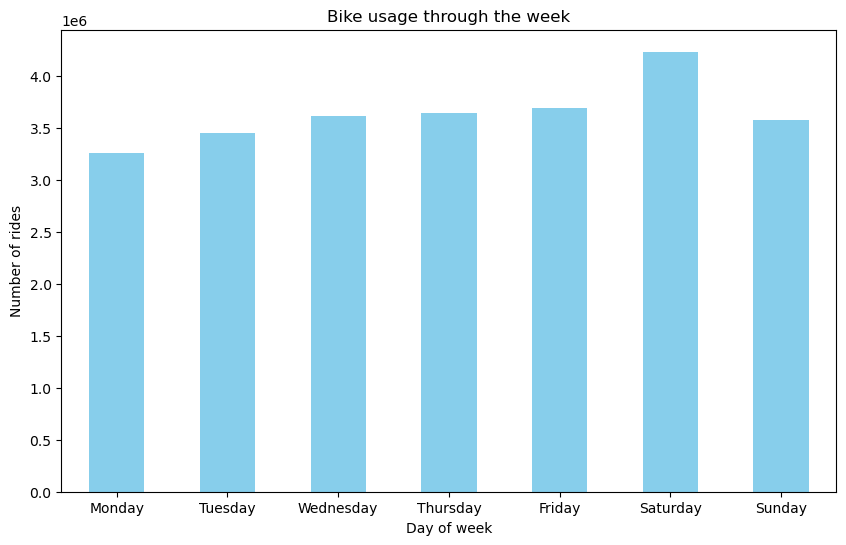

In [29]:
day_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Bike usage through the week')
plt.xlabel('Day of week')
plt.ylabel('Number of rides')
plt.xticks(rotation=0);

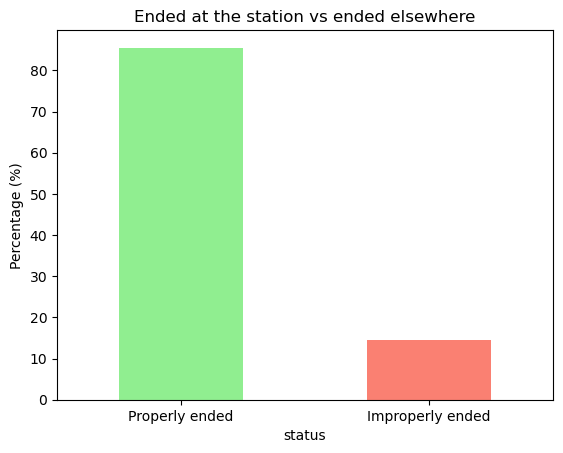

In [30]:
# Calculate the counts of NaN and non-NaN values
total_count = len(df['end_station_id'])
nan_count = (df['end_station_id'].isna().sum() / total_count) * 100
not_nan_count = (df['end_station_id'].notna().sum() / total_count) * 100

# Create a DataFrame for plotting
counts_df = pd.DataFrame({
    'status': ['Properly ended', 'Improperly ended'],
    'count': [not_nan_count, nan_count]
})

# Plot the bars
counts_df.plot(kind='bar', x='status', y='count', legend=False, color=['lightgreen', 'salmon'])
plt.xticks(rotation=0)
plt.ylabel('Percentage (%)')
plt.title('Ended at the station vs ended elsewhere');

In [38]:
df.to_csv('df.tsv', sep='\t')

In [39]:
total_incidences.index = total_incidences.index.strftime('%Y-%m')
total_incidences.to_csv('total_incidences.tsv', sep='\t')